In [2]:
#Packages 
import numpy as np
import xarray as xr
import matplotlib.path as mpath
import numpy as np
# from geographiclib.geodesic import Geodesic

import glob
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import ticker
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [40]:
ds = xr.open_dataset('/lustre/scratch5/dschlichting/runs/seahorce_231221/gom3_r9/ocean/global_ocean/GoM5/WOA23/dynamic_adjustment/damped_adjustment_2/output.nc')
dsi = xr.open_dataset('/lustre/scratch5/dschlichting/runs/seahorce_231221/gom3_r3/ocean/global_ocean/GoM5/WOA23/init/initial_state/initial_state.nc')

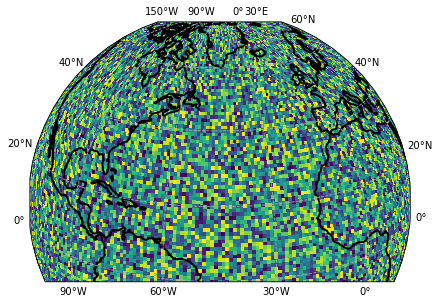

In [41]:
# Creating fake data
x = np.linspace(-180, 180, 361)
y = np.linspace(-90, 90, 181)
lon, lat = np.meshgrid(x, y)
values = np.random.random(lon.shape)*20


fig = plt.figure(figsize=(15, 10))

proj = ccrs.NearsidePerspective(central_longitude=-45, central_latitude=21)

ax = fig.add_subplot(121, projection=proj)
ax.set_extent([-120, 40, 0, 60])

ax.pcolormesh(lon, lat, values, transform=ccrs.PlateCarree())

ax.coastlines(linewidth=2)
gl = ax.gridlines(draw_labels=True, linestyle='--')

In [42]:
lat = dsi.latCell*180/np.pi
lon = dsi.lonCell*180/np.pi
area = dsi.areaCell/1e6
area.min()
# plt.tricontourf(lon, lat, zdata)

<xarray.DataArray 'areaCell' ()>
array(6.1402849)

In [43]:
dsi

<xarray.Dataset>
Dimensions:                    (nCells: 344508, nEdges: 1042963,
                                nVertices: 698275, Time: 1, maxEdges: 8,
                                TWO: 2, vertexDegree: 3, nVertLevels: 64,
                                maxEdges2: 16)
Dimensions without coordinates: nCells, nEdges, nVertices, Time, maxEdges, TWO,
                                vertexDegree, nVertLevels, maxEdges2
Data variables: (12/67)
    LTSRegion                  (nCells) int32 ...
    angleEdge                  (nEdges) float64 ...
    areaCell                   (nCells) float64 8.663e+09 ... 7.956e+06
    areaTriangle               (nVertices) float64 ...
    atmosphericPressure        (Time, nCells) float64 ...
    bed_elevation              (nCells) float64 ...
    ...                         ...
    yCell                      (nCells) float64 ...
    yEdge                      (nEdges) float64 ...
    yVertex                    (nVertices) float64 ...
    zCell                      (nCells) float64 ...
    zEdge                      (nEdges) float64 ...
    zVertex                    (nVertices) float64 ...
Attributes: (12/1312)
    model_name:                                                      mpas
    core_name:                                                       ocean
    source:                                                          MPAS
    Conventions:                                                     MPAS
    git_version:                                                     v2.1.0-1...
    on_a_sphere:                                                     YES
    ...                                                              ...
    MPAS_Mesh_NCO_Version:                                           5.1.9
    MPAS_Mesh_ESMF_Version:                                          8.4.2
    MPAS_Mesh_geometric_features_Version:                            1.3.0
    MPAS_Mesh_Metis_Version:                                         5.1.1
    MPAS_Mesh_pyremap_Version:                                       1.2.0
    NCO:                                                             netCDF O...

In [44]:
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                edgecolor='face',
                                facecolor=cfeature.COLORS['land'])

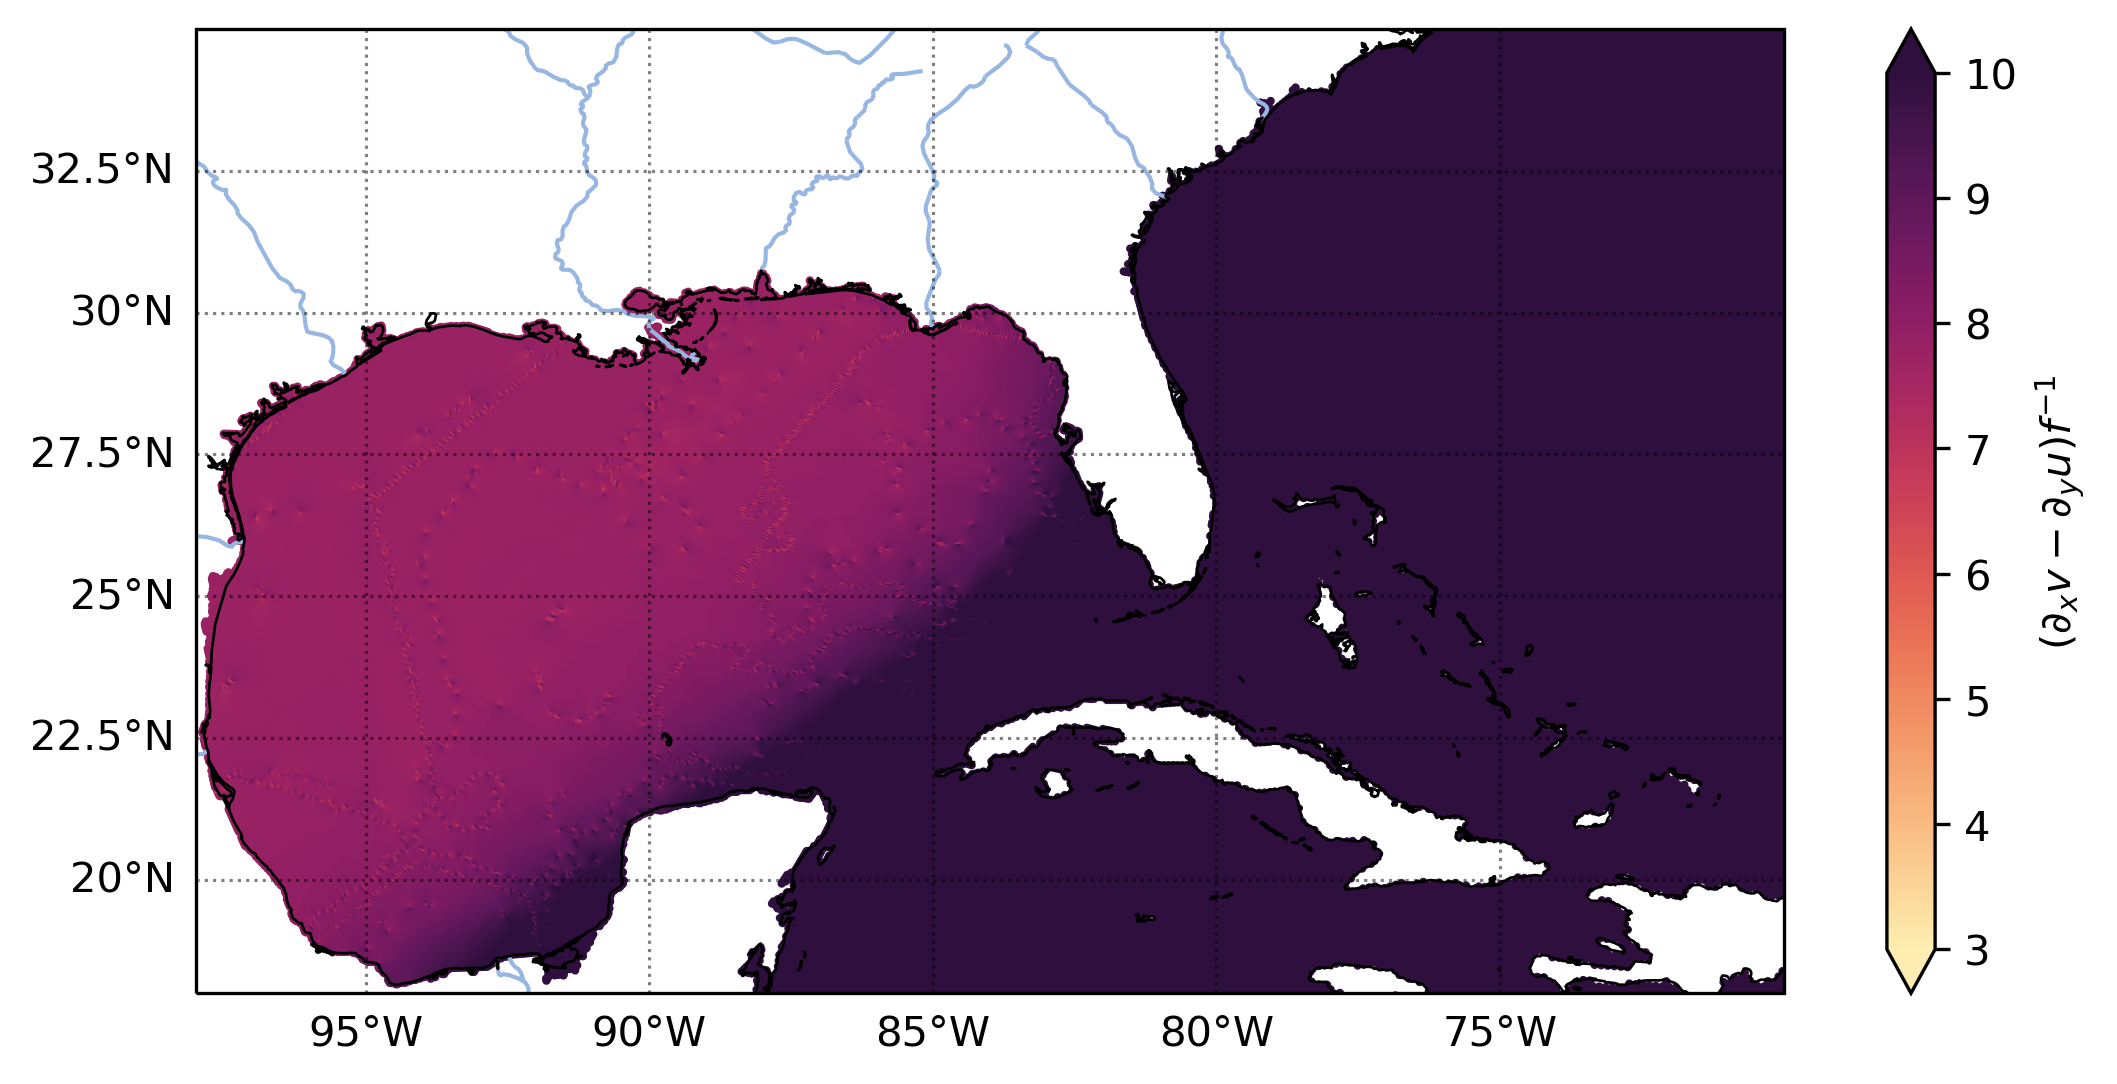

In [45]:
t = -1
fig, ax = plt.subplots(1, figsize = (8,3.5), 
                       subplot_kw={'projection': ccrs.PlateCarree()}, 
                       constrained_layout = True, dpi = 300)

m = ax.scatter(lon,lat,c=area,
               cmap=plt.get_cmap('cmo.matter'),
               vmin=3,vmax=10, s= 1,
               transform = ccrs.PlateCarree())

ax.set_extent([-98, -70, 18, 35], ccrs.PlateCarree())

# ax.add_feature(land_10m, facecolor='0.8')
ax.add_feature(cartopy.feature.RIVERS, linewidth=1)
ax.coastlines(resolution='10m', linewidth = 0.65)  
fig.colorbar(m, ax = ax, label = r'$(\partial_x v - \partial_y u) f^{-1}$', extend = 'both')

gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True
# ax.set_title('Surface vorticity: '+str(ds_64.xtime[t].values)[4:-1])
fig.canvas.draw()